In [1]:
from eda_imports import *

In [2]:
%time adf = pd.read_pickle('./DTLA_crime_data_2009_to_2019.pkl')

CPU times: user 477 ms, sys: 56.9 ms, total: 534 ms
Wall time: 565 ms


In [3]:
bdf = adf[adf.datetime > datetime.datetime(2016, 1, 1)].copy()

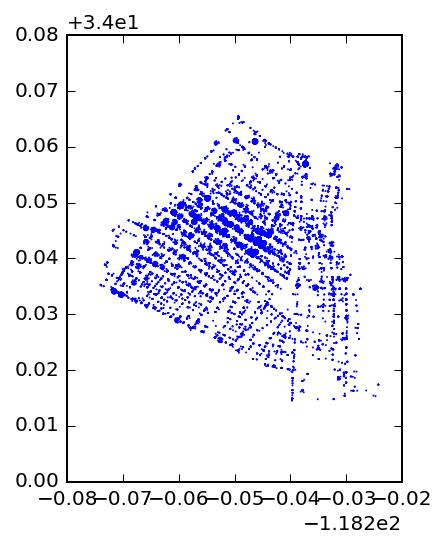

In [4]:
bdf.plot(edgecolor='none', markersize=1)

In [5]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.io import output_notebook
from bokeh.models import LabelSet

In [6]:
GOOGLE_MAPS_API_KEY = os.environ['GOOGLE_MAPS_API_KEY']

In [7]:
bdf['lng'] = bdf.geometry.x.values
bdf['lat'] = bdf.geometry.y.values

In [8]:
coords = bdf[['lng', 'lat']].values

In [9]:
coords.shape

(24707, 2)

In [10]:
bdf.head()

,datetime_str,geometry,icon_url,location,offense_type,url,datetime,year,hour,month,lng,lat
0,"Jan. 2, 2016, 11:30 p.m.",POINT (-118.24639 34.045264),http://www.latimes.com/includes/projects/img/crime/crime_theft.png,200 block of East 5th Street,Theft,/crime/report/1303355/,2016-01-02 23:30:00,2016,23,1,-118.246390,34.045264
1,"Jan. 2, 2016, 11:30 p.m.",POINT (-118.246695 34.045005),http://www.latimes.com/includes/projects/img/crime/crime_burglary.png,200 block of East 5th Street,Burglary,/crime/report/1274162/,2016-01-02 23:30:00,2016,23,1,-118.246695,34.045005
2,"Jan. 2, 2016, 10:45 p.m.",POINT (-118.245878 34.049525),http://www.latimes.com/includes/projects/img/crime/crime_vehicle.png,3rd Street and Main,Theft from vehicle,/crime/report/1270533/,2016-01-02 22:45:00,2016,22,1,-118.245878,34.049525
3,"Jan. 2, 2016, 10 p.m.",POINT (-118.236089 34.047531),http://www.latimes.com/includes/projects/img/crime/crime_vehicle.png,100 block of South Hewitt Street,Theft from vehicle,/crime/report/1267912/,2016-01-02 22:00:00,2016,22,1,-118.236089,34.047531
4,"Jan. 2, 2016, 10 p.m.",POINT (-118.245543 34.05364),http://www.latimes.com/includes/projects/img/crime/crime_robbery.png,1st Street and Broadway Avenue,Robbery,/crime/report/1267910/,2016-01-02 22:00:00,2016,22,1,-118.245543,34.053640


### Plot all crimes together

In [11]:
output_notebook()

Loading BokehJS ...

In [12]:
%%time

df_plot = bdf

map_options = GMapOptions(lat=np.median(bdf.geometry.y), lng=np.median(bdf.geometry.x), map_type="roadmap", zoom=15)

p = gmap(GOOGLE_MAPS_API_KEY, map_options, plot_width=1200, plot_height=700, title='')

color = 'red'
p.circle(x=bdf.lng,  y=bdf.lat,  size=3, fill_color=color,  line_color=color, fill_alpha=0.5, line_width=1, legend='crimes')

p.legend.click_policy="hide"

show(p)

CPU times: user 642 ms, sys: 5.61 ms, total: 648 ms
Wall time: 650 ms


### Plot type offense type

In [13]:
output_file('./DTLA_crime_since_2016_interactive.html')

In [14]:
%%time

df_plot = bdf

map_options = GMapOptions(lat=np.median(bdf.geometry.y), lng=np.median(bdf.geometry.x), map_type="roadmap", zoom=14)

p = gmap(GOOGLE_MAPS_API_KEY, map_options, plot_width=1200, plot_height=700, title='')

for color, t in zip(['cyan', 'green', 'red', 'magenta', 'purple', 'blue', 'orange', 'black'], bdf.offense_type.value_counts().index.values):
    _df = bdf.query(f'offense_type == "{t}"')
    p.circle(x=_df.lng,  y=_df.lat,  size=3, fill_color=color,  line_color=color, fill_alpha=0.5, line_width=1, legend=t)

p.legend.click_policy="hide"

show(p)

CPU times: user 867 ms, sys: 13.4 ms, total: 880 ms
Wall time: 1 s
